In [1]:
import numpy as np 
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 
import re
from tqdm.auto import tqdm
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import matplotlib
# So that we can edit the text in illustrator
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

fig_out_dir = Path("final_figures/figure_4")
fig_out_dir.mkdir(exist_ok=True, parents=True)



### Room used in test is anechoic simulation of MIT 46-1004

In [ ]:
### Load speech distractor conditions 
out_dir = Path('data')
out_dir.mkdir(parents=True, exist_ok=True)
speech_dist_results = pd.read_csv(out_dir / 'feature_gain_main_v10_all_1_distractor_spatial_configurations_raw.csv')
wanted_azims = np.arange(-90, 91, 10)
# Crop to wanted subset 
speech_dist_results = speech_dist_results[(speech_dist_results.distractor_elev == 0) 
                                        & (speech_dist_results.target_elev == 0)
                                        & (speech_dist_results.target_azim.isin(wanted_azims))
                                        & (speech_dist_results.distractor_azim.isin(wanted_azims))]

speech_dist_results['distractor_type'] = 'speech'


### Load SSN distractor conditions
out_dir = Path("data")
ssn_distractor_results = pd.read_csv(out_dir / 'feature_gain_main_v10_core_1_ssn_distractor_spatial_configurations_raw_ssn.csv')

In [4]:
speech_dist_results.head()

,Unnamed: 0,target_azim,target_elev,distractor_azim,distractor_elev,snr,model,accuracy,accuracy_sem,confusions,confusions_sem,distractor_type
506,0,0,0,0,0,0,word_task_v10_main_feature_gain_config,0.513320,0.011316,0.119365,0.007340,speech
520,0,0,0,-10,0,0,word_task_v10_main_feature_gain_config,0.705943,0.010315,0.010246,0.002280,speech
597,0,0,0,-20,0,0,word_task_v10_main_feature_gain_config,0.762807,0.009630,0.001537,0.000887,speech
646,0,0,0,90,0,0,word_task_v10_main_feature_gain_config,0.769467,0.009535,0.001025,0.000724,speech
653,0,0,0,80,0,0,word_task_v10_main_feature_gain_config,0.778689,0.009398,0.000512,0.000512,speech


In [5]:
ssn_distractor_results.head()

,target_azim,target_elev,distractor_azim,distractor_elev,snr,model,accuracy,accuracy_sem,confusions,confusions_sem,distractor_type
0,0,0,0,0,0,word_task_v10_main_feature_gain_config,0.630635,0.010927,0.000000,0.000000,noise
1,0,0,-10,0,0,word_task_v10_main_feature_gain_config,0.721824,0.010145,0.000512,0.000512,noise
2,0,0,-20,0,0,word_task_v10_main_feature_gain_config,0.761783,0.009644,0.001025,0.000724,noise
3,0,0,90,0,0,word_task_v10_main_feature_gain_config,0.796619,0.009113,0.000000,0.000000,noise
4,0,0,80,0,0,word_task_v10_main_feature_gain_config,0.792008,0.009189,0.000000,0.000000,noise


In [6]:
n_unique_elevations = ssn_distractor_results.target_elev.nunique()
n_unique_azimuths = ssn_distractor_results.target_azim.nunique()


# Supplementary figure 4a

Text(0.5, 1.35, 'Model simulation of distractor \n azimuth configurations')

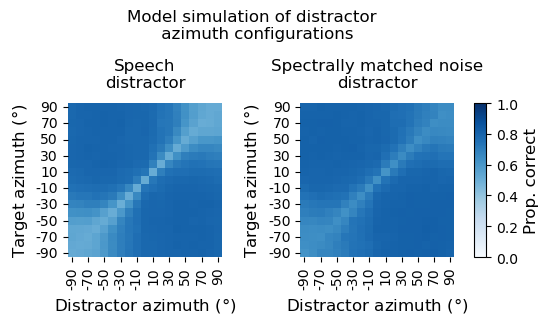

In [7]:
### plot 90 to 90 azimuth, averaging over elevation as heatmap 
fontsize=12
fig, axes = plt.subplots(1,2, figsize=(5.5,2))
azims_to_plot = np.arange(-90, 91, 10)

for i, ax in enumerate(axes):
    if i == 0:
        results = speech_dist_results
        title = "Speech\ndistractor"
    else:
        results = ssn_distractor_results
        title = "Spectrally matched noise\ndistractor"

    acc_to_plot = results.groupby(['target_azim', "distractor_azim"])['accuracy'].mean().unstack()
    acc_heatmap = sns.heatmap(acc_to_plot, vmin=0, vmax=1, cmap='Blues', cbar=False, ax=ax, square=True,)# linewidths=0.48,  linecolor='k')

    ax.set_xlabel('Distractor azimuth ($\degree$)', fontsize=fontsize)
    ax.set_ylabel('Target azimuth ($\degree$)', fontsize=fontsize)
    ax.set_title(title, y=1.05, fontsize=fontsize)
    ax.invert_yaxis()
    ax.set_aspect('equal')

# Add common colorbars for each row
cbar_ax_acc = fig.add_axes([0.9, 0.11, 0.022, 0.77])  # [left, bottom, width, height]
plt.colorbar(acc_heatmap.get_children()[0], cax=cbar_ax_acc)

# set colorbar label
cbar_ax_acc.set_ylabel('Prop. correct', fontsize=fontsize)
fig.suptitle("Model simulation of distractor \n azimuth configurations", y=1.35, fontsize=fontsize)

# plt.savefig(fig_out_dir / "sup_figure_x_speech_v_ssn_distractor_azim-x-azim.pdf", transparent=True, bbox_inches='tight')

# Supplementary figure 4b

In [8]:
all_dist_results = pd.concat([speech_dist_results, ssn_distractor_results], axis=0, ignore_index=True)

Text(0.5, 1.2, 'Model simulation of distractor azimuth configurations\nSpeech vs Noise distractors')

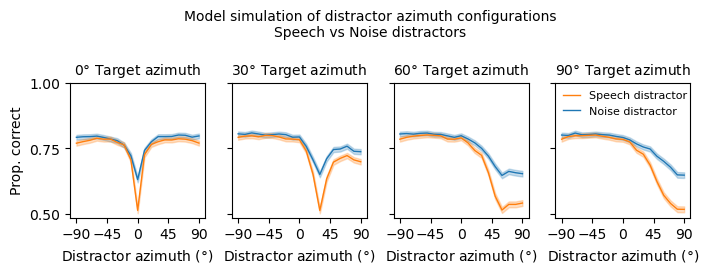

In [9]:
target_azims_to_plot = [0, 30, 60, 90]
palette_dict = {'noise': '#1f77b4', 'speech': '#ff7f0e'}
err_band_alpha = 0.25
fontsize=10
aspect = 2 
ratio = 1 
to_plot = all_dist_results[all_dist_results.target_azim.isin(target_azims_to_plot)]
n_azims = len(target_azims_to_plot)

fig, axes = plt.subplots(1, n_azims, figsize=(aspect * n_azims ,aspect), sharey=True)

tgt_axes_dict = {0: 0, 30: 1, 60: 2, 90: 3}
# Add error 
for (tgt_azim, dist_type), selected in to_plot.groupby(['target_azim', 'distractor_type']):
    ax_ix = tgt_axes_dict[tgt_azim]
    ax = axes[ax_ix]
    dist_azims = selected['distractor_azim'].values
    # sort by azimuth
    sorted_ix = np.argsort(dist_azims)
    dist_azims = dist_azims[sorted_ix]
    # sort accuracy and sem
    acc = selected['accuracy'].values[sorted_ix]
    acc_sem = selected['accuracy_sem'].values[sorted_ix]
    # plot accuracy
    ax.plot(dist_azims, acc, color=palette_dict[dist_type], lw=1, label=dist_type)
    # plot accuracy sem
    ax.fill_between(dist_azims, acc - acc_sem, acc + acc_sem, color=palette_dict[dist_type], alpha=err_band_alpha)
    # set xticks 
    ax.set_xticks(np.arange(-90, 100, 45))
    # set yticks 
    ax.set_yticks(np.arange(0.5, 1.1, 0.25))
    # set axis labels 
    if tgt_azim == 0:
        ax.set_ylabel("Prop. correct", fontsize=fontsize)  
    ax.set_xlabel("Distractor azimuth ($\degree$)", fontsize=fontsize)
    ax.set_title(f"{tgt_azim}$\degree$ Target azimuth", fontsize=fontsize)
    xleft, xright = ax.get_xlim()
    ybottom, ytop = ax.get_ylim()
    ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

# Add legend
legend_elements = [Line2D([0], [0], color=palette_dict['speech'], lw=1, label='Speech distractor'),
                   Line2D([0], [0], color=palette_dict['noise'], lw=1, label='Noise distractor')]
fig.legend(handles=legend_elements, loc='upper right', fontsize=fontsize-2, frameon=False,
              handlelength=1.5, handleheight=0.5, borderpad=0.5, labelspacing=0.5,
              bbox_to_anchor=(0.91, 0.85), bbox_transform=fig.transFigure)

fig.suptitle("Model simulation of distractor azimuth configurations\nSpeech vs Noise distractors", y=1.2, fontsize=fontsize)

# plt.savefig(fig_out_dir / "azim-x-azim_lineplot_for_sup.pdf", transparent=True, bbox_inches='tight')